<h2 style="font-family: 'Constantia'; font-size: 36px; color: #CBC3E3;"> 2 🧽 Data Cleaning and Preprocessing 🧽
<p style="color: #CF9FFF; font-family: 'Constantia', cursive;"> 🧹Feature Extraction and Feature Engineering🧹</p></h2>

<img src="https://i.gifer.com/H0hD.gif" alt= "Vacuuuuuuuum">

In [74]:
# Basic libraries
import pymysql
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # great library for visualisating the distribution of nulls!
import statsmodels.api as sm

# Hypothesis Testing
import math
from scipy import stats
from scipy.stats import ttest_ind

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import metrics



# Other
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('pokemon.csv')
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
data.shape

(801, 41)

In [5]:
print(data.loc[1])

abilities            ['Overgrow', 'Chlorophyll']
against_bug                                  1.0
against_dark                                 1.0
against_dragon                               1.0
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                 2.0
against_flying                               2.0
against_ghost                                1.0
against_grass                               0.25
against_ground                               1.0
against_ice                                  2.0
against_normal                               1.0
against_poison                               1.0
against_psychic                              2.0
against_rock                                 1.0
against_steel                                1.0
against_water                                0.5
attack                                        62
base_egg_steps      

In [6]:
print(data.dtypes)

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [7]:
#Overview of columns



| **Column Name**       | **Description**                                                 |
|-----------------------|-----------------------------------------------------------------|
| name                  | The English name of the Pokemon                                |
| japanese_name         | The Original Japanese name of the Pokemon                      |
| pokedex_number        | The entry number of the Pokemon in the National Pokedex        |
| percentage_male       | The percentage of the species that are male. Blank if the Pokemon is genderless. |
| type1                 | The Primary Type of the Pokemon                                 |
| type2                 | The Secondary Type of the Pokemon                               |
| classification        | The Classification of the Pokemon as described by the Sun and Moon Pokedex |
| height_m              | Height of the Pokemon in metres                                 |
| weight_kg             | The Weight of the Pokemon in kilograms                          |
| capture_rate          | Capture Rate of the Pokemon                                     |
| base_egg_steps        | The number of steps required to hatch an egg of the Pokemon     |
| abilities             | A stringified list of abilities that the Pokemon is capable of having |
| experience_growth     | The Experience Growth of the Pokemon                            |
| base_happiness        | Base Happiness of the Pokemon                                   |
| against_?             | Eighteen features that denote the amount of damage taken against an attack of a particular type |
| hp                    | The Base HP of the Pokemon                                      |
| attack                | The Base Attack of the Pokemon                                  |
| defense               | The Base Defense of the Pokemon                                 |
| sp_attack             | The Base Special Attack of the Pokemon                          |
| sp_defense            | The Base Special Defense of the Pokemon                         |
| speed                 | The Base Speed of the Pokemon                                   |
| generation            | The numbered generation which the Pokemon was first introduced  |
| is_legendary          | Denotes if the Pokemon is legendary                             |



In [8]:
num_classification= data['classfication'].nunique() # i notice that there's a typo, will correct it in the next cell
print(num_classification) # the number of unique non-numerical classifications indicate it is impractical for it to be encoded, so this column will be dropped later

588


In [9]:
# Renaming columns

In [10]:
data.rename(columns={'classfication': 'classification'}, inplace=True)

In [11]:
## Index number

In [12]:
data['pokedex_number'].nunique() #the pokedex number is a unique ID assigned to each pokemon in the game, thus it serves as a good stand in as the index

801

In [13]:
#Let's check for duplicates

In [14]:
duplicates = data['pokedex_number'].duplicated()
if any(duplicates):
    print("There are duplicate Pokédex numbers. Gotta clean 'em up!'")
else:
    print("No duplicate Pokédex numbers. You're in the clear!")

No duplicate Pokédex numbers. You're in the clear!


In [15]:
### As there are no duplicate pokedex numbers, we can transform it into the index for easier navigation

In [16]:
data.set_index('pokedex_number', inplace=True)

In [17]:
data.head() #to see if setting the index was successful

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


In [18]:
# Adjusting Data Types

In [19]:
print(data.dtypes) # to check if datatypes need to be changed

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classification        object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
sp_attack              int64
sp_defense             int64
speed         

In [20]:
print(data.loc[1]) # to check if datatypes need to be changed

abilities            ['Overgrow', 'Chlorophyll']
against_bug                                  1.0
against_dark                                 1.0
against_dragon                               1.0
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                 2.0
against_flying                               2.0
against_ghost                                1.0
against_grass                               0.25
against_ground                               1.0
against_ice                                  2.0
against_normal                               1.0
against_poison                               1.0
against_psychic                              2.0
against_rock                                 1.0
against_steel                                1.0
against_water                                0.5
attack                                        49
base_egg_steps      

In [21]:
# As we can see from the above, the capture_rate is presented in numerical form, but is listed as having an object dataytype. Let's convert it to int

In [22]:
# Filter the DataFrame to show rows with non-numeric values in the "capture_rate" column
non_numeric_capture_rate = data[data['capture_rate'].apply(lambda x: bool(re.search(r'\D', x)))]

# Display the filtered DataFrame
print(non_numeric_capture_rate[['name', 'capture_rate']])

                  name              capture_rate
pokedex_number                                  
774             Minior  30 (Meteorite)255 (Core)


In [23]:
#Upon further research, the core capture rate reflects the success of catching the pokemon when it transforms into a smaller version of itself upon having less than 50% of its HP left. As this is the only pokemon to have such an attribute, I have decided to remove the core capture rate.

In [24]:
# Locates the row wherein the name is Minior, and extracts the corresponding index, and then changing the value to 30.
minior_row_index = data[data['name'] == 'Minior'].index
data.loc[minior_row_index, 'capture_rate'] = '30'


In [25]:
data['capture_rate'] = data['capture_rate'].astype('int64') #converting the datatype to int64

In [26]:
## Dealing with Nulls

In [27]:
def explore_data(data): 
    
    duplicate_rows = data.duplicated().sum() # check duplicated data (rows), same function that was performed on pokedex_numbers
    nan_values = data.isna().sum() # check null
    empty_spaces = data.eq(' ').sum() # check whitespace/empty string
    
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f" Found {data.duplicated().sum()} duplicated rows.")
    return exploration

explore_data(data)

 Found 0 duplicated rows.


,NaN,EmptySpaces
abilities,0,0
against_bug,0,0
against_dark,0,0
against_dragon,0,0
against_electric,0,0
against_fairy,0,0
against_fight,0,0
against_fire,0,0
against_flying,0,0
against_ghost,0,0


In [28]:
### There are 4 variables with nulls: height_m, percentage_male, type2, and weight_kg. Let's delve into them using three visualizations from missingno.

In [29]:
# As we can see from the barchart below, type2 variable has the most nulls.

<AxesSubplot:>

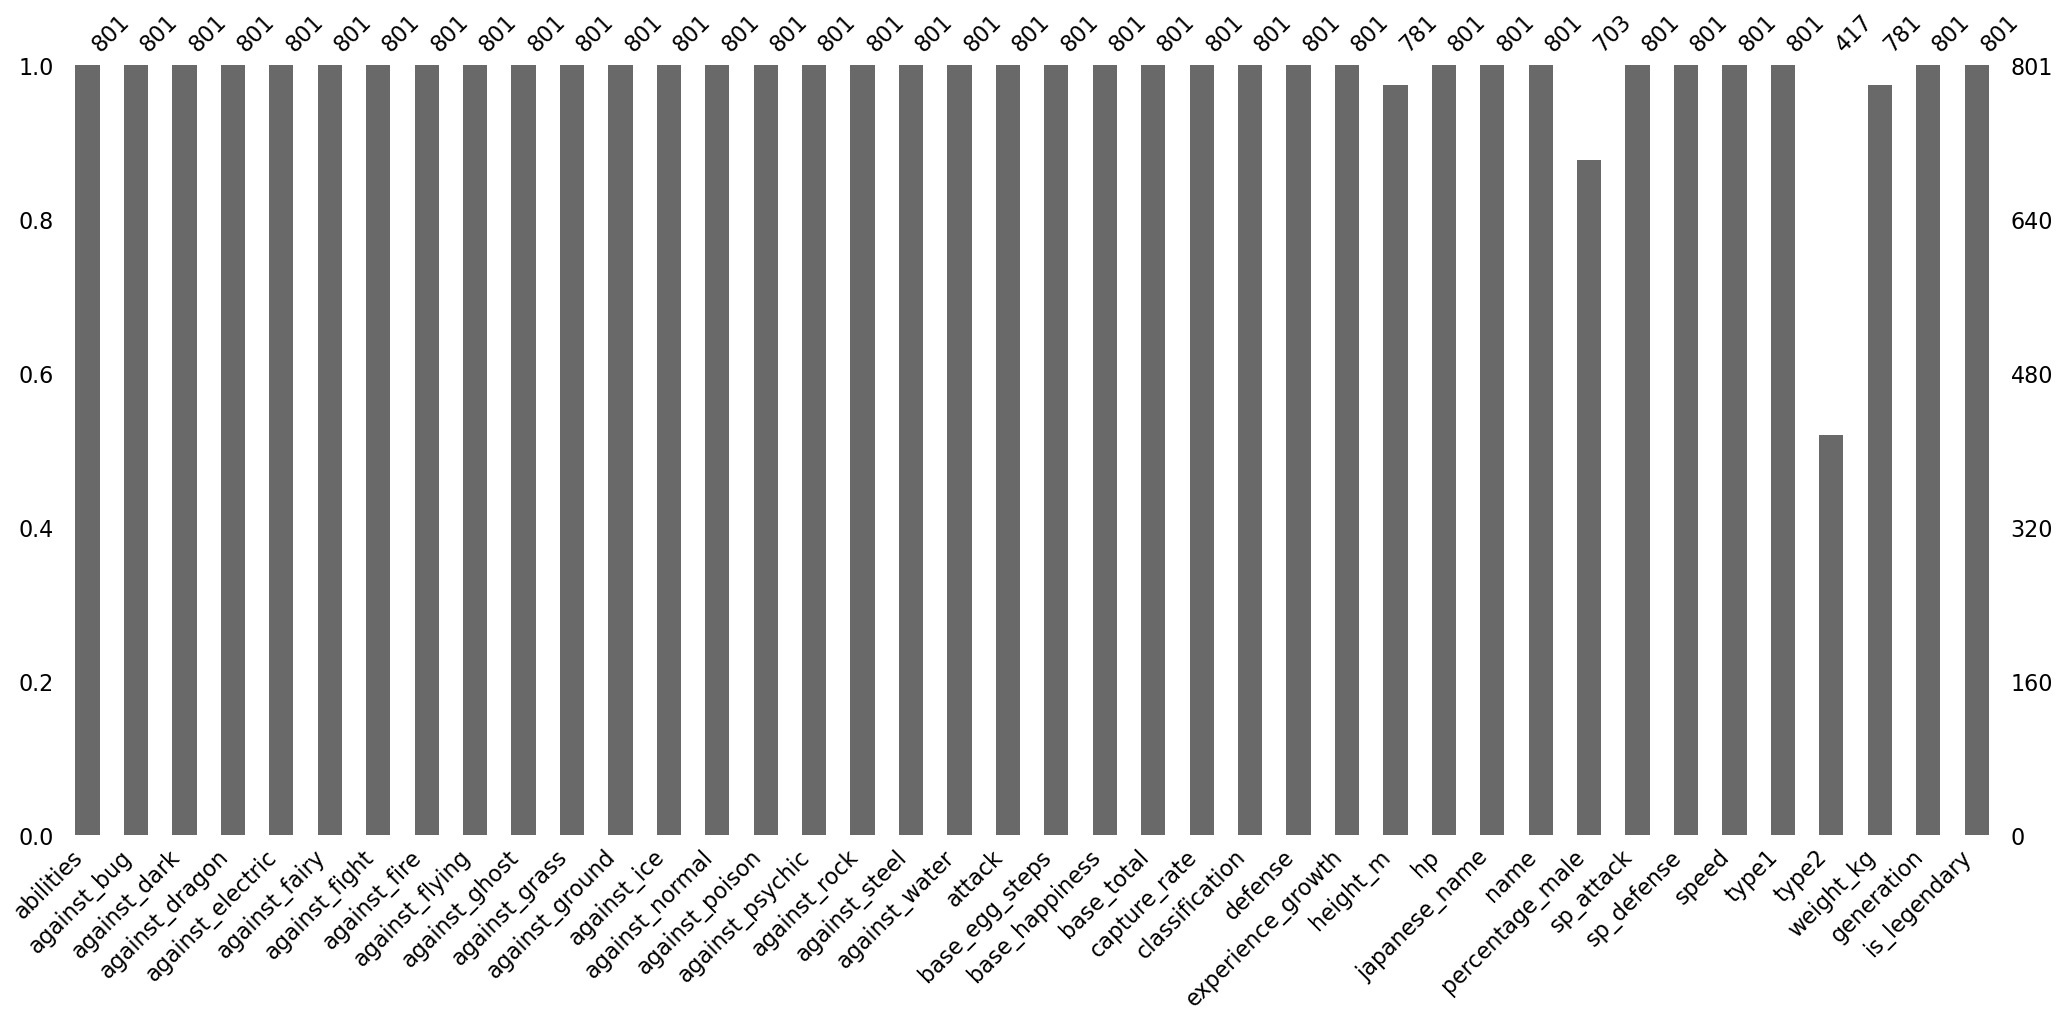

In [30]:
msno.bar(data)

In [31]:
# As we can see from the matrix chart below, the nulls are evenly spread out in type2 and percentage_male.

<AxesSubplot:>

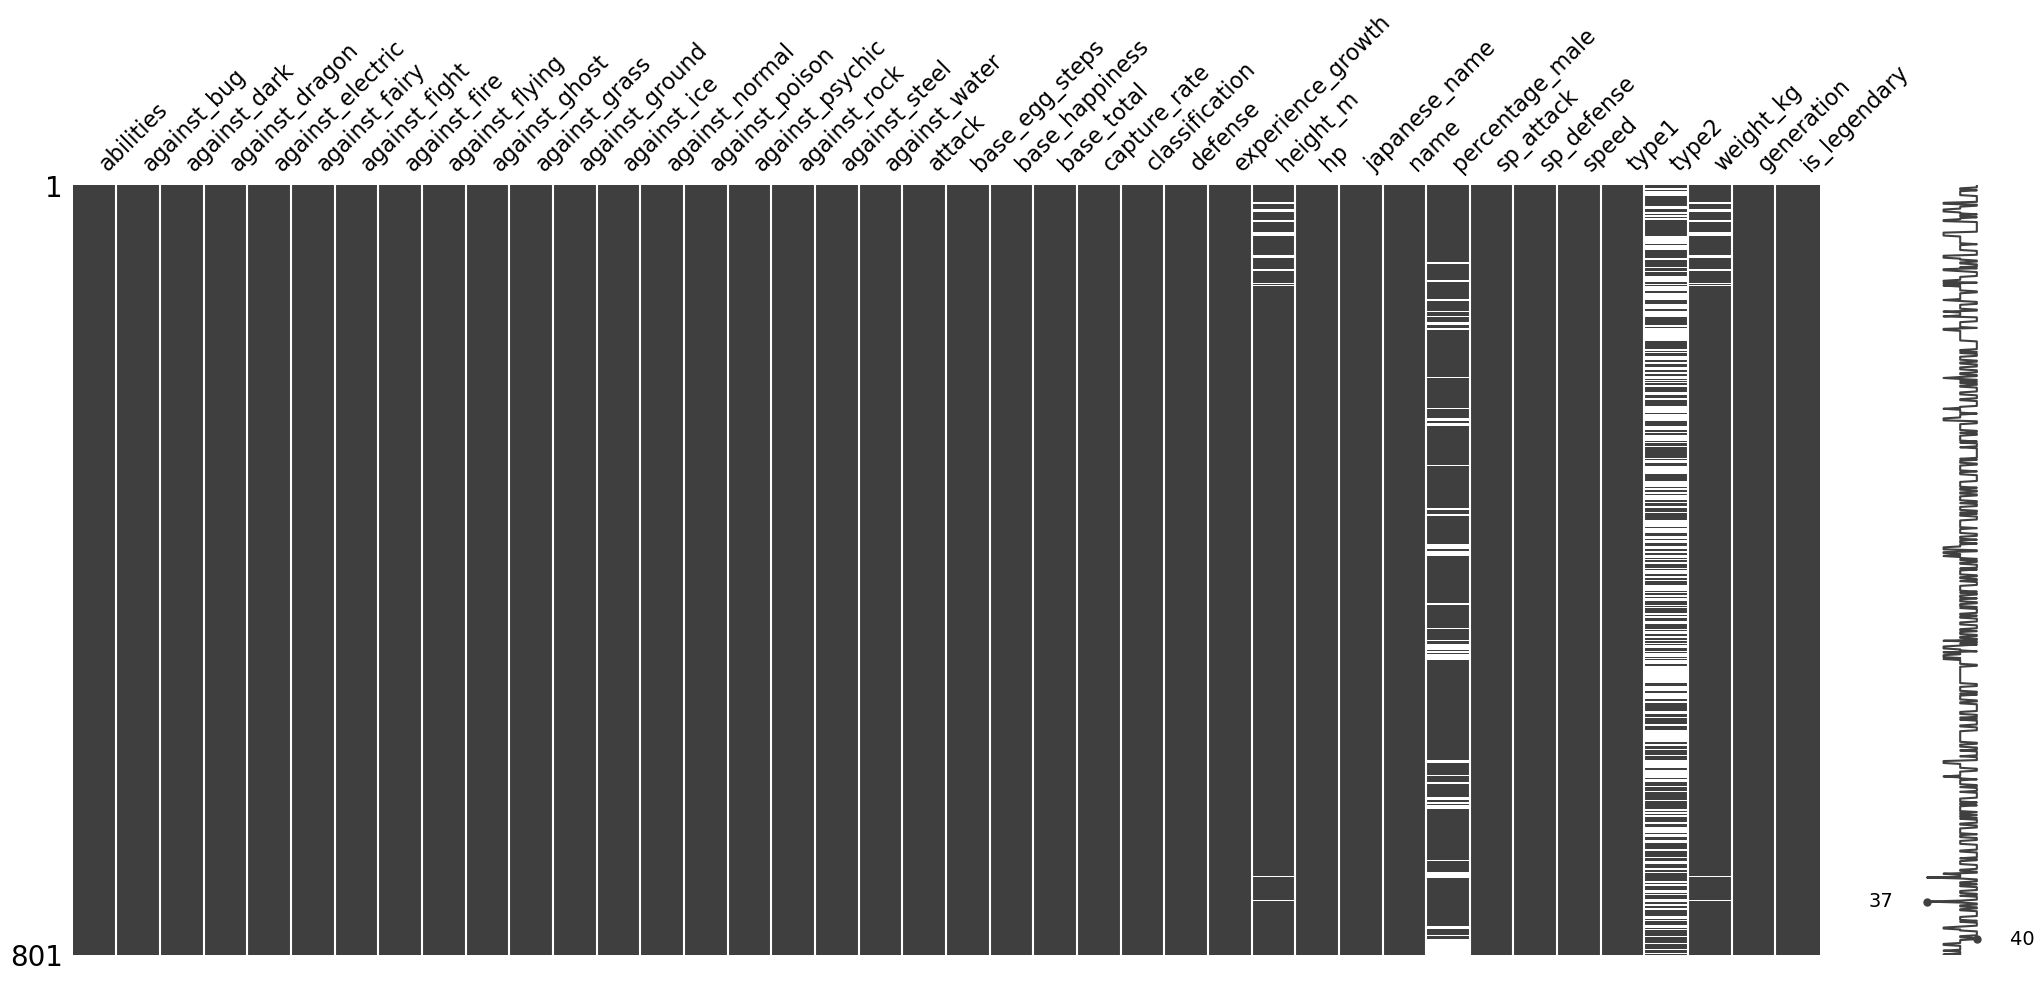

In [32]:
msno.matrix(data)

In [33]:
# As we can see from this heatmap, the nulls between weight_kg and height_m are perfectly correlated. That is something that needs to be taken into account when the variable is processed/cleaned.

<AxesSubplot:>

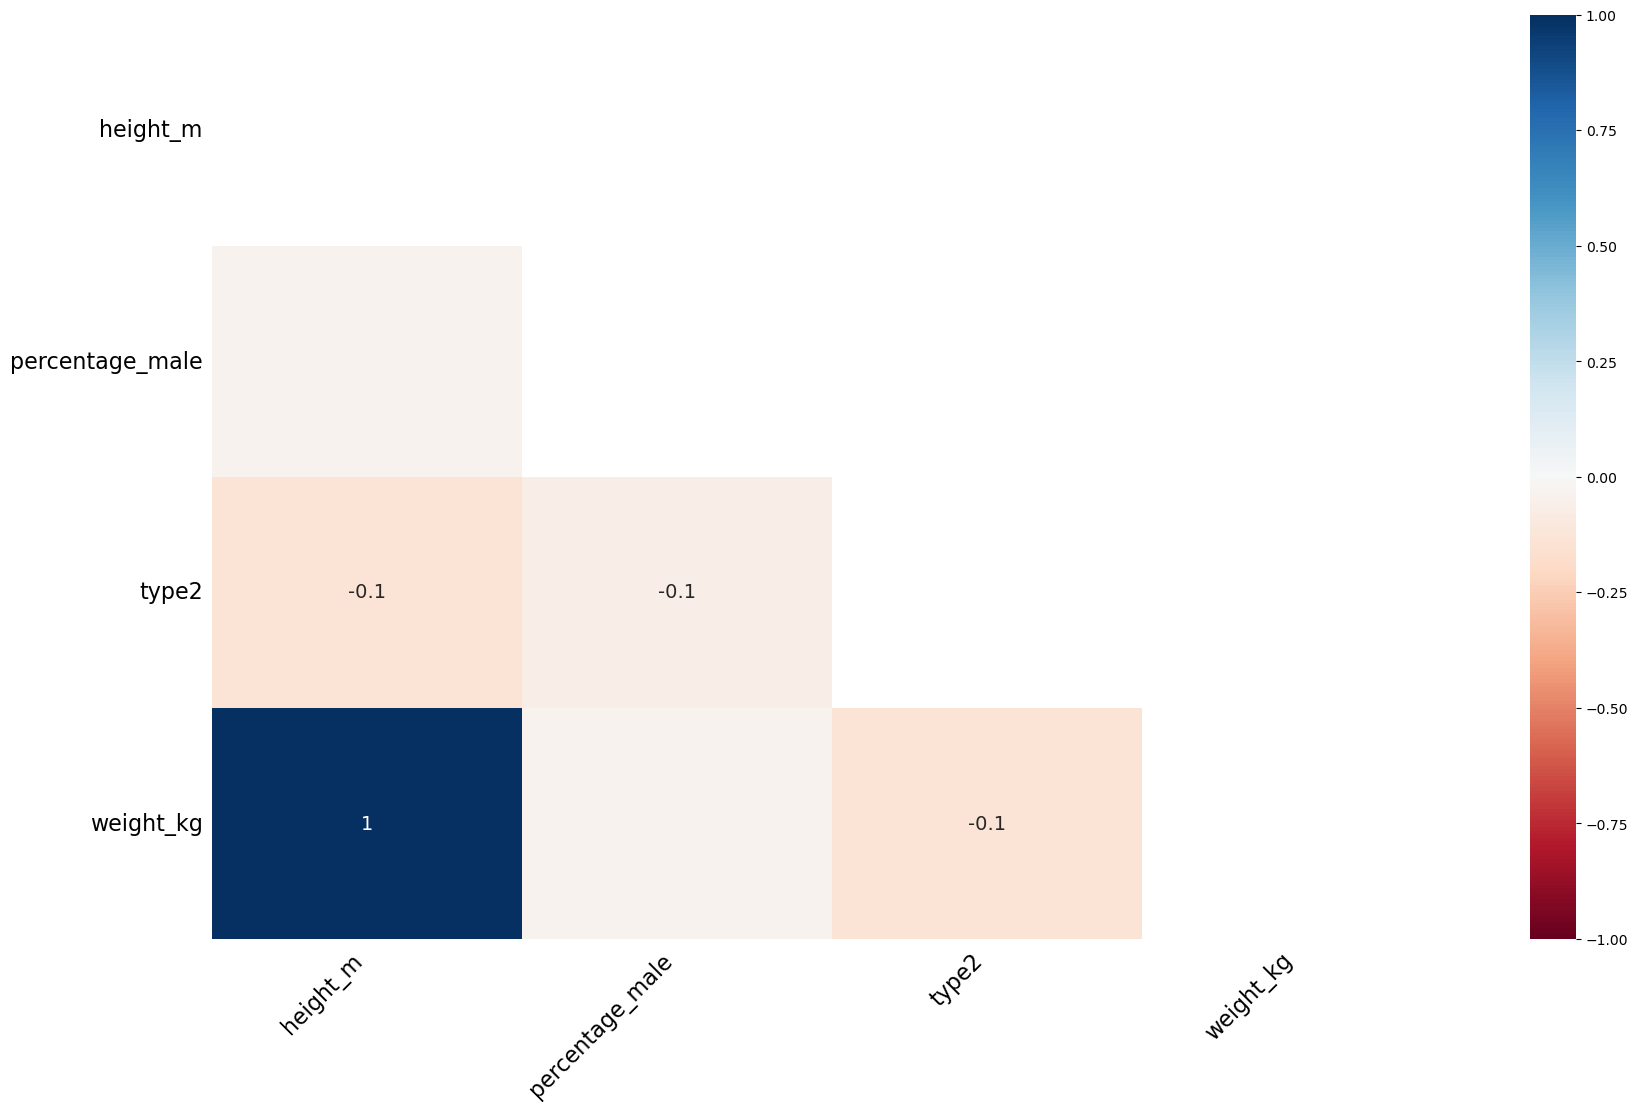

In [34]:
msno.heatmap(data) 

In [35]:
# Feature Engineering 

In [36]:
## percentage_male Variable

In [37]:
gender_unclean= data[['name', 'percentage_male']]
print(gender_unclean)

                        name  percentage_male
pokedex_number                               
1                  Bulbasaur             88.1
2                    Ivysaur             88.1
3                   Venusaur             88.1
4                 Charmander             88.1
5                 Charmeleon             88.1
6                  Charizard             88.1
7                   Squirtle             88.1
8                  Wartortle             88.1
9                  Blastoise             88.1
10                  Caterpie             50.0
11                   Metapod             50.0
12                Butterfree             50.0
13                    Weedle             50.0
14                    Kakuna             50.0
15                  Beedrill             50.0
16                    Pidgey             50.0
17                 Pidgeotto             50.0
18                   Pidgeot             50.0
19                   Rattata             50.0
20                  Raticate      

In [38]:
# Checking if the 'percentage_male' column is 0 (indicating all Pokémon are female) by applying a mask
is_zero_mask = (data['percentage_male'] == 0)

# Selecting rows where 'percentage_male' is 0
entirely_female_pokemon= data[is_zero_mask]

In [39]:
# After further research, the digit '0' does not indicate a missing value -- it indicates that the population of the given pokemon is entirely female.This means what we truly should be looking at is how to handle the NaNs

In [40]:
print(entirely_female_pokemon[['name', 'percentage_male']]) #list of pokemon where the population is entirely female

                      name  percentage_male
pokedex_number                             
29                Nidoran♀              0.0
30                Nidorina              0.0
31               Nidoqueen              0.0
113                Chansey              0.0
115             Kangaskhan              0.0
124                   Jynx              0.0
238               Smoochum              0.0
241                Miltank              0.0
242                Blissey              0.0
314               Illumise              0.0
380                 Latias              0.0
413               Wormadam              0.0
416              Vespiquen              0.0
440                Happiny              0.0
478               Froslass              0.0
488              Cresselia              0.0
548                Petilil              0.0
549              Lilligant              0.0
629                Vullaby              0.0
630              Mandibuzz              0.0
669                Flabébé      

In [41]:
#pd.set_option('display.max_rows', None)  #to display all the rows and columns so I can verify as to whether all the pokemon in this list are genderless
#pd.set_option('display.max_columns', None)

In [42]:
#After manually checking all the pokemon in this list, it can be confirmed that all the pokemon with NaNs are indeed genderless. 

In [43]:
percentage_male_nan = data[data['percentage_male'].isnull()] 
print(percentage_male_nan[['name', 'percentage_male']])


                      name  percentage_male
pokedex_number                             
81               Magnemite              NaN
82                Magneton              NaN
100                Voltorb              NaN
101              Electrode              NaN
120                 Staryu              NaN
121                Starmie              NaN
132                  Ditto              NaN
137                Porygon              NaN
144               Articuno              NaN
145                 Zapdos              NaN
146                Moltres              NaN
150                 Mewtwo              NaN
151                    Mew              NaN
201                  Unown              NaN
233               Porygon2              NaN
243                 Raikou              NaN
244                  Entei              NaN
245                Suicune              NaN
249                  Lugia              NaN
250                  Ho-Oh              NaN
251                 Celebi      

In [44]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [45]:
(98/801)*100 #12.2% of all Pokemon are genderless, which is a significant amount, so dropping all of them doesn't seem like a good idea

12.234706616729088

In [46]:
# Thus, how to process this value depends on the requirements of the models that I choose to use, as it would impact the analysis. In this case, there is no numeric value that can accurately represent genderless pokemon from a scale of 0-100. Doing so will also cause the subsequent classifier model to interpret the variable as a continuous ordinal/numerical variable. Therfore, I have chosen to impute all NaNs as '0's, while also creating a separate binary feature named 'genderless'. That way, I would be able to retain this information without having to impute the NaNs with a numerical value. 

In [47]:
data['is_genderless']= data['percentage_male'].isnull().astype(int) # creating a new binary feature named 'is_genderless' consisting of a 0 or 1 (True/False)

In [48]:
print(data['is_genderless'].head()) #to see what it looks like

pokedex_number
1    0
2    0
3    0
4    0
5    0
Name: is_genderless, dtype: int32


In [49]:
data['percentage_male'].fillna(0, inplace=True) #filling all the NaNs in 'percentage_male' with 0, directly to the dataframe. Genderless pokemon are technically not male, and the separate binary feature expands on this further by specifying whether the pokemon is genderless or not. YAY to feature engineering!

In [50]:
pd.set_option('display.max_rows', None)  #to display all the rows and columns

In [51]:
print(data[['name', 'percentage_male', 'is_genderless']]) # see see lookie lookie

                        name  percentage_male  is_genderless
pokedex_number                                              
1                  Bulbasaur             88.1              0
2                    Ivysaur             88.1              0
3                   Venusaur             88.1              0
4                 Charmander             88.1              0
5                 Charmeleon             88.1              0
6                  Charizard             88.1              0
7                   Squirtle             88.1              0
8                  Wartortle             88.1              0
9                  Blastoise             88.1              0
10                  Caterpie             50.0              0
11                   Metapod             50.0              0
12                Butterfree             50.0              0
13                    Weedle             50.0              0
14                    Kakuna             50.0              0
15                  Beed

In [52]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [53]:
## weight_kg and _height_m variables

In [54]:
# I will look into these variables simultaneously as the nulls are perfectly correlated

In [55]:
data['weight_kg'].isna().sum()

20

In [56]:
data['height_m'].isna().sum()

20

In [57]:
#As the nulls are perfectly correlated, I would like to see if they belong to the same pokemon

In [58]:
both_nulls= data['weight_kg'].isnull() & data['height_m'].isnull()
pokemon_with_both_nulls= data[both_nulls]
print(pokemon_with_both_nulls[['name', 'weight_kg', 'height_m']])

                     name  weight_kg  height_m
pokedex_number                                
19                Rattata        NaN       NaN
20               Raticate        NaN       NaN
26                 Raichu        NaN       NaN
27              Sandshrew        NaN       NaN
28              Sandslash        NaN       NaN
37                 Vulpix        NaN       NaN
38              Ninetales        NaN       NaN
50                Diglett        NaN       NaN
51                Dugtrio        NaN       NaN
52                 Meowth        NaN       NaN
53                Persian        NaN       NaN
74                Geodude        NaN       NaN
75               Graveler        NaN       NaN
76                  Golem        NaN       NaN
88                 Grimer        NaN       NaN
89                    Muk        NaN       NaN
103             Exeggutor        NaN       NaN
105               Marowak        NaN       NaN
720                 Hoopa        NaN       NaN
745          

In [59]:
len(pokemon_with_both_nulls)

20

In [60]:
# The results confirm that the nulls are perfectly correlated -- because they belong to the same pokemon!!!!!!! As the Kaggle dataset was scrapped from serebii, I can access the dataset manually to check if there is indeed no height or weight data associated to these pokemon. After checking serebii, it seems that there is indeed height and weight data associated to each of the listed pokemon. Thus, instead of choosing to impute it using the mean (whcih I would normally do), I will extract the missing values from serebii for the sake of accuracy. I will also do this manually as it would be faster to do so considering the considerably few number of rows involved versus the complexity of the site's html code (it doesn't make sense time wise). However, I will webscrape the site later on for images.

In [61]:
#Accessed from https://www.serebii.net/pokedex-sm/{}.shtml
#Compiling all the replacement values in a list

replacement_values= replacement_values = {
    "Rattata": {'weight_kg': 3.5, 'height_m': 0.3},
    "Raticate": {'weight_kg': 18.5, 'height_m': 0.7},
    "Raichu": {'weight_kg': 30.0, 'height_m': 0.8},
    "Sandshrew": {'weight_kg': 12.0, 'height_m': 0.6},
    "Sandslash": {'weight_kg': 29.5, 'height_m': 1.0},
    "Vulpix": {'weight_kg': 9.9, 'height_m': 0.6},
    "Ninetales": {'weight_kg': 19.9, 'height_m': 1.1},
    "Diglett": {'weight_kg': 0.8, 'height_m': 0.2},
    "Dugtrio": {'weight_kg': 33.3, 'height_m': 0.7},
    "Meowth": {'weight_kg': 4.2, 'height_m': 0.4},
    "Persian": {'weight_kg': 32.0, 'height_m': 1.0},
    "Geodude": {'weight_kg': 20.0, 'height_m': 0.4},
    "Graveler": {'weight_kg': 105.0, 'height_m': 1.0},
    "Golem": {'weight_kg': 300.0, 'height_m': 1.4},
    "Grimer": {'weight_kg': 30.0, 'height_m': 0.7},
    "Muk": {'weight_kg': 30.0, 'height_m': 1.0},
    "Exeggutor": {'weight_kg': 120.0, 'height_m': 2.0},
    "Marowak": {'weight_kg': 45.0, 'height_m': 1.0},
    "Hoopa": {'weight_kg': 9.0, 'height_m': 0.5},
    "Lycanroc": {'weight_kg': 25.0, 'height_m': 0.8}, }

In [62]:
for index, row in data.iterrows():  # iterrows is a loop function that iterates through each row in the dataframe, which in this case is 'data'
    name= row['name']
    if name in replacement_values:
        for col, value in replacement_values[name].items():
            if pd.isna(row[col]):
                data.loc[index,col]=value
            

In [63]:
# checking if the missing values have been imputed...success!

print(data.loc[data['name'].isin([ "Rattata", "Raticate", "Raichu", "Sandshrew", "Sandslash", "Vulpix", "Ninetales", "Diglett", "Dugtrio", "Meowth", "Persian", "Geodude",
"Graveler", "Golem", "Grimer", "Muk", "Exeggutor", "Marowak", "Hoopa", "Lycanroc"]), ['name', 'weight_kg', 'height_m']])  


                     name  weight_kg  height_m
pokedex_number                                
19                Rattata        3.5       0.3
20               Raticate       18.5       0.7
26                 Raichu       30.0       0.8
27              Sandshrew       12.0       0.6
28              Sandslash       29.5       1.0
37                 Vulpix        9.9       0.6
38              Ninetales       19.9       1.1
50                Diglett        0.8       0.2
51                Dugtrio       33.3       0.7
52                 Meowth        4.2       0.4
53                Persian       32.0       1.0
74                Geodude       20.0       0.4
75               Graveler      105.0       1.0
76                  Golem      300.0       1.4
88                 Grimer       30.0       0.7
89                    Muk       30.0       1.0
103             Exeggutor      120.0       2.0
105               Marowak       45.0       1.0
720                 Hoopa        9.0       0.5
745          

In [64]:
## type_2 variable

In [65]:
type_2_nulls= data['type2'].isnull()
type2nulls= data[type_2_nulls]

In [66]:
pd.set_option('display.max_rows', None)  # to display all the rows and columns

In [67]:
print(type2nulls[['name', 'type1', 'type2']])

                      name     type1 type2
pokedex_number                            
4               Charmander      fire   NaN
5               Charmeleon      fire   NaN
7                 Squirtle     water   NaN
8                Wartortle     water   NaN
9                Blastoise     water   NaN
10                Caterpie       bug   NaN
11                 Metapod       bug   NaN
23                   Ekans    poison   NaN
24                   Arbok    poison   NaN
25                 Pikachu  electric   NaN
29                Nidoran♀    poison   NaN
30                Nidorina    poison   NaN
32                Nidoran♂    poison   NaN
33                Nidorino    poison   NaN
35                Clefairy     fairy   NaN
36                Clefable     fairy   NaN
54                 Psyduck     water   NaN
55                 Golduck     water   NaN
56                  Mankey  fighting   NaN
57                Primeape  fighting   NaN
58               Growlithe      fire   NaN
59         

In [68]:
both_type_nulls= data['type1'].isnull() & data['type2'].isnull()
bothtypenulls=data[both_type_nulls]

In [69]:
print(bothtypenulls[['name', 'type1', 'type2']]) # there are no pokemon where both types are missing

Empty DataFrame
Columns: [name, type1, type2]
Index: []


In [70]:
# After further research, it appears that pokemon with only one type - in this case, type1-, indicates that the pokemon is of one pure elemental type. For example, Charmander is a pure fire pokemon, and hence has only one type, which is fire. In other words, the NaNs in type2 should be imputed with 'None' as opposed to NaN.

In [71]:
for index, row in data.iterrows():
    if pd.isna(row['type2']):
        data.loc[index, 'type2'] = 'None'

In [72]:
row_4_subset = data.loc[4, ['name', 'type1', 'type2']]
print(row_4_subset) #this shows that the NaNs have been correctly imputed with 'None'!

name     Charmander
type1          fire
type2          None
Name: 4, dtype: object


In [73]:
data.to_csv('pokemon_partially_cleaned.csv', index=False) #let's save this to the data frame for hypothesis testing, please proceed to Part 3 for the rest of the preprocessing and cleaning!